## Preparação dos dados

In [ ]:
import numpy as np
import pandas as pd
import random
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('csv_result_ebay.csv')
df.shape

(5806, 75)

In [ ]:
df.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,cconscientiousness,sconscientiousness,magreeableness,cagreeableness,sagreeableness,mopenness,copenness,sopenness,agreeablenessIndico,conscientiousnessIndico,extraversionIndico,opennessIndico,openessWatson,conscientiousnessWatson,extraversionWatson,agreeablenessWatson,neuroticismWatson,o_adventure,o_artistic,o_emotionality,o_imagination,o_intelect,o_liberalism,c_achievement,c_cautiouness,c_dutifulness,c_orderliness,c_discipline,c_efficacy,e_activity,e_assertiveness,e_cheerfulness,e_excitement,e_friend,e_gregariouness,a_altruism,a_cooperation,a_modesty,a_morality,a_simpathy,a_trust,n_anger,n_anxiety,n_depression,n_immoderation,n_selfconsciouness,n_vulnerability,need_chalenge,need_closeness,need_curiosity,need_excitement,need_harmony,need_ideal,need_liberty,need_love,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,0.5,0,4.110703,0.4,0,5.645506,0.6,1,0.684026,0.410566,0.646393,0.541885,0.835889,0.607272,0.589781,0.797063,0.449051,0.479940,0.753559,0.744320,0.758126,0.684179,0.526194,0.683279,0.559430,0.667665,0.522323,0.570964,0.746656,0.496348,0.649539,0.577345,0.553578,0.541931,0.350008,0.750762,0.626144,0.476133,0.701773,0.764204,0.512819,0.569980,0.611817,0.446330,0.468466,0.542865,0.442188,0.587795,0.833622,0.810144,0.462635,0.852183,0.628620,0.681354,0.820817,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,0.5,0,3.806675,0.4,0,6.190563,0.6,1,0.464647,0.431002,0.569719,0.588085,0.830316,0.572403,0.564882,0.722874,0.461567,0.478643,0.710639,0.701289,0.782399,0.716377,0.547235,0.657048,0.510715,0.654974,0.505224,0.543689,0.754035,0.463572,0.667516,0.547494,0.580140,0.514974,0.327534,0.724414,0.556060,0.424484,0.610452,0.757238,0.514746,0.595900,0.623953,0.500948,0.467786,0.569568,0.408936,0.596168,0.766870,0.790915,0.473358,0.800680,0.628022,0.667925,0.785016,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,0.5,0,4.307670,0.4,0,5.834547,0.8,1,0.574335,0.438136,0.594625,0.536566,0.849708,0.582639,0.577375,0.752931,0.451419,0.510756,0.737884,0.676704,0.785777,0.684304,0.577079,0.658175,0.517050,0.639082,0.509898,0.520291,0.725458,0.487635,0.578349,0.528123,0.555361,0.474853,0.326494,0.678454,0.619364,0.453175,0.678154,0.694500,0.525181,0.579213,0.619524,0.519524,0.479714,0.611395,0.482310,0.641673,0.755555,0.818792,0.506326,0.798245,0.617355,0.700126,0.735538,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,0.7,0,4.613918,0.5,1,4.348694,0.7,1,0.574341,0.514639,0.514115,0.495976,0.790834,0.674920,0.646031,0.763297,0.549710,0.489649,0.646631,0.608902,0.677307,0.614726,0.488001,0.712907,0.549355,0.664191,0.538321,0.596186,0.756297,0.585698,0.624495,0.582153,0.520175,0.525256,0.373468,0.661293,0.656178,0.414692,0.648699,0.612588,0.611793,0.545152,0.545936,0.449869,0.435871,0.523706,0.440116,0.675587,0.751850,0.813193,0.556613,0.775064,0.700630,0.701459,0.690972,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,0.5,1,4.743250,0.3,0,4.486198,0.7,1,0.627522,0.542976,0.485505,0.485903,0.786669,0.670957,0.540510,0.764619,0.529810,0.473329,0.663005,0.608885,0.695995,0.601024,0.477730,0.702990,0.554734,0.667045,0.529989,0.574750,0.733478,0.563220,0.540472,0.565630,0.504446,0.493837,0.343277,0.644033,0.713643,0.449867,0.670262,0.618680,0.596047,0.516514,0.583900,0.494273,0.412867,0.575115,0.481213,0.621911,0.779859,0.786455,0.486580,0.808006,0.641099,0.686376,0.724988,0.718530,0.616852,0.692761,0.646695,0.677245,0.699

In [ ]:
df.isnull().values.any()
# Não existem valores NaN no dataframe

False

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


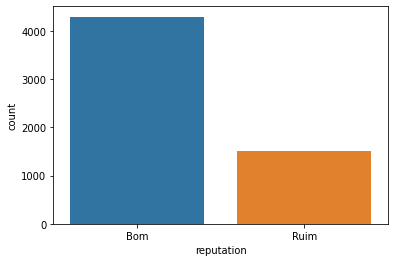

In [ ]:
sns.countplot(df['reputation']);

In [ ]:
df['blacklist'].unique()

array(['N', 'B'], dtype=object)

In [ ]:
df_copy = df.copy()

In [ ]:
df_copy.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,cconscientiousness,sconscientiousness,magreeableness,cagreeableness,sagreeableness,mopenness,copenness,sopenness,agreeablenessIndico,conscientiousnessIndico,extraversionIndico,opennessIndico,openessWatson,conscientiousnessWatson,extraversionWatson,agreeablenessWatson,neuroticismWatson,o_adventure,o_artistic,o_emotionality,o_imagination,o_intelect,o_liberalism,c_achievement,c_cautiouness,c_dutifulness,c_orderliness,c_discipline,c_efficacy,e_activity,e_assertiveness,e_cheerfulness,e_excitement,e_friend,e_gregariouness,a_altruism,a_cooperation,a_modesty,a_morality,a_simpathy,a_trust,n_anger,n_anxiety,n_depression,n_immoderation,n_selfconsciouness,n_vulnerability,need_chalenge,need_closeness,need_curiosity,need_excitement,need_harmony,need_ideal,need_liberty,need_love,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,N,4.181642,0.6,1,2.777591,0.6,0,4.085460,0.5,0,4.110703,0.4,0,5.645506,0.6,1,0.684026,0.410566,0.646393,0.541885,0.835889,0.607272,0.589781,0.797063,0.449051,0.479940,0.753559,0.744320,0.758126,0.684179,0.526194,0.683279,0.559430,0.667665,0.522323,0.570964,0.746656,0.496348,0.649539,0.577345,0.553578,0.541931,0.350008,0.750762,0.626144,0.476133,0.701773,0.764204,0.512819,0.569980,0.611817,0.446330,0.468466,0.542865,0.442188,0.587795,0.833622,0.810144,0.462635,0.852183,0.628620,0.681354,0.820817,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,N,4.007042,0.6,0,2.698650,0.6,0,4.187338,0.5,0,3.806675,0.4,0,6.190563,0.6,1,0.464647,0.431002,0.569719,0.588085,0.830316,0.572403,0.564882,0.722874,0.461567,0.478643,0.710639,0.701289,0.782399,0.716377,0.547235,0.657048,0.510715,0.654974,0.505224,0.543689,0.754035,0.463572,0.667516,0.547494,0.580140,0.514974,0.327534,0.724414,0.556060,0.424484,0.610452,0.757238,0.514746,0.595900,0.623953,0.500948,0.467786,0.569568,0.408936,0.596168,0.766870,0.790915,0.473358,0.800680,0.628022,0.667925,0.785016,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,N,4.538230,0.7,1,2.298492,0.5,1,5.085833,0.5,0,4.307670,0.4,0,5.834547,0.8,1,0.574335,0.438136,0.594625,0.536566,0.849708,0.582639,0.577375,0.752931,0.451419,0.510756,0.737884,0.676704,0.785777,0.684304,0.577079,0.658175,0.517050,0.639082,0.509898,0.520291,0.725458,0.487635,0.578349,0.528123,0.555361,0.474853,0.326494,0.678454,0.619364,0.453175,0.678154,0.694500,0.525181,0.579213,0.619524,0.519524,0.479714,0.611395,0.482310,0.641673,0.755555,0.818792,0.506326,0.798245,0.617355,0.700126,0.735538,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,N,4.692854,0.3,0,2.987231,0.5,0,4.831320,0.7,0,4.613918,0.5,1,4.348694,0.7,1,0.574341,0.514639,0.514115,0.495976,0.790834,0.674920,0.646031,0.763297,0.549710,0.489649,0.646631,0.608902,0.677307,0.614726,0.488001,0.712907,0.549355,0.664191,0.538321,0.596186,0.756297,0.585698,0.624495,0.582153,0.520175,0.525256,0.373468,0.661293,0.656178,0.414692,0.648699,0.612588,0.611793,0.545152,0.545936,0.449869,0.435871,0.523706,0.440116,0.675587,0.751850,0.813193,0.556613,0.775064,0.700630,0.701459,0.690972,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,N,4.966753,0.3,0,3.048730,0.5,0,4.725294,0.5,1,4.743250,0.3,0,4.486198,0.7,1,0.627522,0.542976,0.485505,0.485903,0.786669,0.670957,0.540510,0.764619,0.529810,0.473329,0.663005,0.608885,0.695995,0.601024,0.477730,0.702990,0.554734,0.667045,0.529989,0.574750,0.733478,0.563220,0.540472,0.565630,0.504446,0.493837,0.343277,0.644033,0.713643,0.449867,0.670262,0.618680,0.596047,0.516514,0.583900,0.494273,0.412867,0.575115,0.481213,0.621911,0.779859,0.786455,0.486580,0.808006,0.641099,0.686376,0.724988,0.718530,0.616852,0.692761,0.646695,0.677245,0.699

In [ ]:
df_copy['blacklist'].replace(['N', 'B'], [1, 0], inplace=True)

In [ ]:
df_copy.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,cconscientiousness,sconscientiousness,magreeableness,cagreeableness,sagreeableness,mopenness,copenness,sopenness,agreeablenessIndico,conscientiousnessIndico,extraversionIndico,opennessIndico,openessWatson,conscientiousnessWatson,extraversionWatson,agreeablenessWatson,neuroticismWatson,o_adventure,o_artistic,o_emotionality,o_imagination,o_intelect,o_liberalism,c_achievement,c_cautiouness,c_dutifulness,c_orderliness,c_discipline,c_efficacy,e_activity,e_assertiveness,e_cheerfulness,e_excitement,e_friend,e_gregariouness,a_altruism,a_cooperation,a_modesty,a_morality,a_simpathy,a_trust,n_anger,n_anxiety,n_depression,n_immoderation,n_selfconsciouness,n_vulnerability,need_chalenge,need_closeness,need_curiosity,need_excitement,need_harmony,need_ideal,need_liberty,need_love,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,1,4.181642,0.6,1,2.777591,0.6,0,4.085460,0.5,0,4.110703,0.4,0,5.645506,0.6,1,0.684026,0.410566,0.646393,0.541885,0.835889,0.607272,0.589781,0.797063,0.449051,0.479940,0.753559,0.744320,0.758126,0.684179,0.526194,0.683279,0.559430,0.667665,0.522323,0.570964,0.746656,0.496348,0.649539,0.577345,0.553578,0.541931,0.350008,0.750762,0.626144,0.476133,0.701773,0.764204,0.512819,0.569980,0.611817,0.446330,0.468466,0.542865,0.442188,0.587795,0.833622,0.810144,0.462635,0.852183,0.628620,0.681354,0.820817,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,Bom
3,0,56,1,4.007042,0.6,0,2.698650,0.6,0,4.187338,0.5,0,3.806675,0.4,0,6.190563,0.6,1,0.464647,0.431002,0.569719,0.588085,0.830316,0.572403,0.564882,0.722874,0.461567,0.478643,0.710639,0.701289,0.782399,0.716377,0.547235,0.657048,0.510715,0.654974,0.505224,0.543689,0.754035,0.463572,0.667516,0.547494,0.580140,0.514974,0.327534,0.724414,0.556060,0.424484,0.610452,0.757238,0.514746,0.595900,0.623953,0.500948,0.467786,0.569568,0.408936,0.596168,0.766870,0.790915,0.473358,0.800680,0.628022,0.667925,0.785016,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,Bom
4,0,50,1,4.538230,0.7,1,2.298492,0.5,1,5.085833,0.5,0,4.307670,0.4,0,5.834547,0.8,1,0.574335,0.438136,0.594625,0.536566,0.849708,0.582639,0.577375,0.752931,0.451419,0.510756,0.737884,0.676704,0.785777,0.684304,0.577079,0.658175,0.517050,0.639082,0.509898,0.520291,0.725458,0.487635,0.578349,0.528123,0.555361,0.474853,0.326494,0.678454,0.619364,0.453175,0.678154,0.694500,0.525181,0.579213,0.619524,0.519524,0.479714,0.611395,0.482310,0.641673,0.755555,0.818792,0.506326,0.798245,0.617355,0.700126,0.735538,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,Bom
5,72,0,1,4.692854,0.3,0,2.987231,0.5,0,4.831320,0.7,0,4.613918,0.5,1,4.348694,0.7,1,0.574341,0.514639,0.514115,0.495976,0.790834,0.674920,0.646031,0.763297,0.549710,0.489649,0.646631,0.608902,0.677307,0.614726,0.488001,0.712907,0.549355,0.664191,0.538321,0.596186,0.756297,0.585698,0.624495,0.582153,0.520175,0.525256,0.373468,0.661293,0.656178,0.414692,0.648699,0.612588,0.611793,0.545152,0.545936,0.449869,0.435871,0.523706,0.440116,0.675587,0.751850,0.813193,0.556613,0.775064,0.700630,0.701459,0.690972,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,Bom
6,76,0,1,4.966753,0.3,0,3.048730,0.5,0,4.725294,0.5,1,4.743250,0.3,0,4.486198,0.7,1,0.627522,0.542976,0.485505,0.485903,0.786669,0.670957,0.540510,0.764619,0.529810,0.473329,0.663005,0.608885,0.695995,0.601024,0.477730,0.702990,0.554734,0.667045,0.529989,0.574750,0.733478,0.563220,0.540472,0.565630,0.504446,0.493837,0.343277,0.644033,0.713643,0.449867,0.670262,0.618680,0.596047,0.516514,0.583900,0.494273,0.412867,0.575115,0.481213,0.621911,0.779859,0.786455,0.486580,0.808006,0.641099,0.686376,0.724988,0.718530,0.616852,0.692761,0.646695,0.677245,0.699

In [ ]:
df_copy['reputation'].unique()

array(['Bom', 'Ruim'], dtype=object)

In [ ]:
df_copy['reputation'].replace(['Bom', 'Ruim'], [1,0], inplace=True)

In [ ]:
df_copy.head()

,feedbacks,reviews,blacklist,mextraversion,cextraversion,sextraversion,mneuroticism,cneuroticism,sneuroticism,mconscientiousness,cconscientiousness,sconscientiousness,magreeableness,cagreeableness,sagreeableness,mopenness,copenness,sopenness,agreeablenessIndico,conscientiousnessIndico,extraversionIndico,opennessIndico,openessWatson,conscientiousnessWatson,extraversionWatson,agreeablenessWatson,neuroticismWatson,o_adventure,o_artistic,o_emotionality,o_imagination,o_intelect,o_liberalism,c_achievement,c_cautiouness,c_dutifulness,c_orderliness,c_discipline,c_efficacy,e_activity,e_assertiveness,e_cheerfulness,e_excitement,e_friend,e_gregariouness,a_altruism,a_cooperation,a_modesty,a_morality,a_simpathy,a_trust,n_anger,n_anxiety,n_depression,n_immoderation,n_selfconsciouness,n_vulnerability,need_chalenge,need_closeness,need_curiosity,need_excitement,need_harmony,need_ideal,need_liberty,need_love,need_practicaly,need_selfexpression,need_stability,need_structure,value_conservation,value_openess,value_hedonism,value_selfenhancement,value_selftranscendence,reputation
2,0,49,1,4.181642,0.6,1,2.777591,0.6,0,4.085460,0.5,0,4.110703,0.4,0,5.645506,0.6,1,0.684026,0.410566,0.646393,0.541885,0.835889,0.607272,0.589781,0.797063,0.449051,0.479940,0.753559,0.744320,0.758126,0.684179,0.526194,0.683279,0.559430,0.667665,0.522323,0.570964,0.746656,0.496348,0.649539,0.577345,0.553578,0.541931,0.350008,0.750762,0.626144,0.476133,0.701773,0.764204,0.512819,0.569980,0.611817,0.446330,0.468466,0.542865,0.442188,0.587795,0.833622,0.810144,0.462635,0.852183,0.628620,0.681354,0.820817,0.696359,0.698786,0.756963,0.660119,0.619416,0.746372,0.640073,0.598037,0.828716,1
3,0,56,1,4.007042,0.6,0,2.698650,0.6,0,4.187338,0.5,0,3.806675,0.4,0,6.190563,0.6,1,0.464647,0.431002,0.569719,0.588085,0.830316,0.572403,0.564882,0.722874,0.461567,0.478643,0.710639,0.701289,0.782399,0.716377,0.547235,0.657048,0.510715,0.654974,0.505224,0.543689,0.754035,0.463572,0.667516,0.547494,0.580140,0.514974,0.327534,0.724414,0.556060,0.424484,0.610452,0.757238,0.514746,0.595900,0.623953,0.500948,0.467786,0.569568,0.408936,0.596168,0.766870,0.790915,0.473358,0.800680,0.628022,0.667925,0.785016,0.715300,0.664572,0.728806,0.660740,0.588969,0.735915,0.644465,0.603042,0.809379,1
4,0,50,1,4.538230,0.7,1,2.298492,0.5,1,5.085833,0.5,0,4.307670,0.4,0,5.834547,0.8,1,0.574335,0.438136,0.594625,0.536566,0.849708,0.582639,0.577375,0.752931,0.451419,0.510756,0.737884,0.676704,0.785777,0.684304,0.577079,0.658175,0.517050,0.639082,0.509898,0.520291,0.725458,0.487635,0.578349,0.528123,0.555361,0.474853,0.326494,0.678454,0.619364,0.453175,0.678154,0.694500,0.525181,0.579213,0.619524,0.519524,0.479714,0.611395,0.482310,0.641673,0.755555,0.818792,0.506326,0.798245,0.617355,0.700126,0.735538,0.720150,0.694678,0.669652,0.627962,0.553523,0.766618,0.655470,0.645042,0.826039,1
5,72,0,1,4.692854,0.3,0,2.987231,0.5,0,4.831320,0.7,0,4.613918,0.5,1,4.348694,0.7,1,0.574341,0.514639,0.514115,0.495976,0.790834,0.674920,0.646031,0.763297,0.549710,0.489649,0.646631,0.608902,0.677307,0.614726,0.488001,0.712907,0.549355,0.664191,0.538321,0.596186,0.756297,0.585698,0.624495,0.582153,0.520175,0.525256,0.373468,0.661293,0.656178,0.414692,0.648699,0.612588,0.611793,0.545152,0.545936,0.449869,0.435871,0.523706,0.440116,0.675587,0.751850,0.813193,0.556613,0.775064,0.700630,0.701459,0.690972,0.739793,0.637027,0.697221,0.638587,0.675289,0.752234,0.679661,0.674438,0.813391,1
6,76,0,1,4.966753,0.3,0,3.048730,0.5,0,4.725294,0.5,1,4.743250,0.3,0,4.486198,0.7,1,0.627522,0.542976,0.485505,0.485903,0.786669,0.670957,0.540510,0.764619,0.529810,0.473329,0.663005,0.608885,0.695995,0.601024,0.477730,0.702990,0.554734,0.667045,0.529989,0.574750,0.733478,0.563220,0.540472,0.565630,0.504446,0.493837,0.343277,0.644033,0.713643,0.449867,0.670262,0.618680,0.596047,0.516514,0.583900,0.494273,0.412867,0.575115,0.481213,0.621911,0.779859,0.786455,0.486580,0.808006,0.641099,0.686376,0.724988,0.718530,0.616852,0.692761,0.646695,0.677245,0.699785,0.64

In [ ]:
# Na divisão dos atributos de treino e teste temos que ter uma variavel
# Para armazenar os atributos previsores
# E outra variavel para armazenar a classe que será predita
# Aqui estou extraindo todos os registros os atributos das colunas 0 a 73 e pondo em X
# Colocamos o .values para converter o DataFrame em um array numpy
X = df_copy.iloc[:,0:74].values

In [ ]:
X.shape

(5806, 74)

In [ ]:
X

array([[ 0.        , 49.        ,  1.        , ...,  0.64007259,
         0.59803704,  0.82871638],
       [ 0.        , 56.        ,  1.        , ...,  0.64446459,
         0.60304177,  0.80937897],
       [ 0.        , 50.        ,  1.        , ...,  0.65546971,
         0.64504203,  0.8260389 ],
       ...,
       [78.        ,  0.        ,  1.        , ...,  0.69746616,
         0.6739035 ,  0.83207265],
       [95.        ,  0.        ,  1.        , ...,  0.77067732,
         0.71004776,  0.81992383],
       [53.        ,  0.        ,  1.        , ...,  0.62393063,
         0.63312052,  0.79209211]])

In [ ]:
y = df_copy.iloc[:, 74].values

In [ ]:
y.shape

(5806,)

In [ ]:
y

array([1, 1, 1, ..., 1, 0, 0])

## Base de treino e teste

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
np.unique(y, return_counts=True)
# Bom - 1 - 4299
# Ruim - 0 - 1507

(array([0, 1]), array([1507, 4299]))

In [ ]:
# Bom - 1 - representa 74% do df
4299 / len(df_copy)

0.7404409231829142

In [ ]:
# Ruim - 0 - representa 25% do df
1507 / len(df_copy)

0.2595590768170858

In [ ]:
# Aqui estou determinando 80% das bases para treino e 20% para teste
# O parametro stratify indica que o algoritmo deve retirar uma amostra estratificada
# Respeitando o percentual de bons pagadores e maus pagadores
# Estou pedindo para estratificar com base nos dados da coluna y
X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=0.2, stratify=y)

In [ ]:
X_treino.shape, y_treino.shape

((4644, 74), (4644,))

In [ ]:
X_teste.shape, y_teste.shape

((1162, 74), (1162,))

In [ ]:
np.unique(y_treino, return_counts=True)

(array([0, 1]), array([1205, 3439]))

In [ ]:
3439/len(y_treino)
# perceba que o percentual de 1 foi respeitado

0.7405254091300603

In [ ]:
1205/len(y_treino)
# perceba que o percentual de 0 foi respeitado

0.2594745908699397

## Classificação com algoritmo Random Forest

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
sc = StandardScaler()
X_treino = sc.fit_transform(X_treino)
X_teste = sc.fit_transform(X_teste)

In [ ]:
clf = RandomForestClassifier()

In [ ]:
clf.fit(X_treino, y_treino)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
previsoes = clf.predict(X_teste)
previsoes

array([1, 1, 1, ..., 1, 1, 1])

In [ ]:
y_teste

array([1, 1, 1, ..., 1, 1, 0])

In [ ]:
accuracy_score(previsoes, y_teste)

0.7452667814113597

In [ ]:
cm = confusion_matrix(previsoes, y_teste)
cm

array([[ 18,  12],
       [284, 848]])

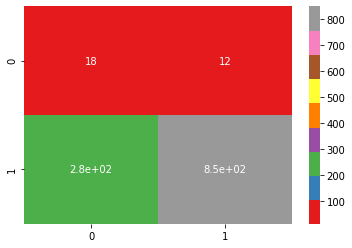

In [ ]:
sns.heatmap(cm, annot=True, cmap="Set1");

In [ ]:
# Percentual de acerto de Ruim
18 / (18+12)

0.6

In [ ]:
# Percentual de acerto de Bom
848 / (284 + 848)

0.7491166077738516

## Subamostragem

In [ ]:
# Subamostragem
from imblearn.under_sampling import TomekLinks

In [ ]:
tl = TomekLinks(return_indices=True, ratio='majority')
X_u, y_u, id_u = tl.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_u.shape, y_u.shape

((5417, 74), (5417,))

In [ ]:
np.unique(y, return_counts=True)

(array([0, 1]), array([1507, 4299]))

In [ ]:
np.unique(y_u, return_counts=True)

(array([0, 1]), array([1507, 3910]))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


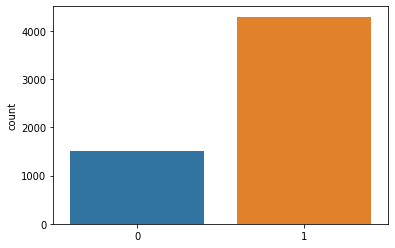

In [ ]:
sns.countplot(y);

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


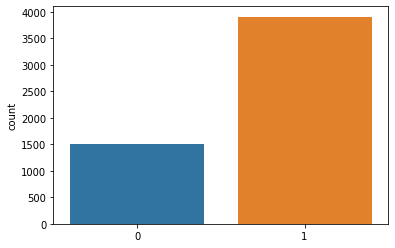

In [ ]:
sns.countplot(y_u);

In [ ]:
X_treino_u, X_teste_u, y_treino_u, y_teste_u = train_test_split(X_u,
                                                                y_u,
                                                                test_size=0.2,
                                                                stratify=y_u)
X_treino_u.shape, X_teste_u.shape

((4333, 74), (1084, 74))

In [ ]:
clf_u = RandomForestClassifier()
clf_u.fit(X_treino_u, y_treino_u)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
previsao_u = clf_u.predict(X_teste_u)

In [ ]:
# Com a subamostragem o desempenho piorou
accuracy_score(previsao_u, y_teste_u)

0.7297047970479705

## Sobreamostragem

In [ ]:
from imblearn.over_sampling import SMOTE

In [ ]:
smote = SMOTE(ratio='minority')
X_over, y_over = smote.fit_sample(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_over.shape, y_over.shape

((8598, 74), (8598,))

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


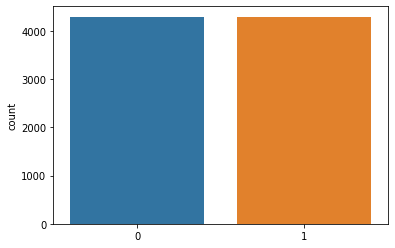

In [ ]:
sns.countplot(y_over);

In [ ]:
X_treino_o, X_teste_o, y_treino_o, y_teste_o = train_test_split(X_over,
                                                                y_over,
                                                                test_size=0.2,
                                                                stratify=y_over)

In [ ]:
X_treino_o.shape, X_teste_o.shape

((6878, 74), (1720, 74))

In [ ]:
y_treino_o.shape, y_teste_o.shape

((6878,), (1720,))

In [ ]:
clf_o = RandomForestClassifier()
clf_o.fit(X_treino_o, y_treino_o)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
previsao_o = clf_o.predict(X_teste_o)

In [ ]:
# Com o oversampling a acurácia melhorou consideravelmente
accuracy_score(previsao_o, y_teste_o)

0.8133720930232559

In [ ]:
cm_o = confusion_matrix(previsao_o, y_teste_o)
cm_o

array([[706, 167],
       [154, 693]])

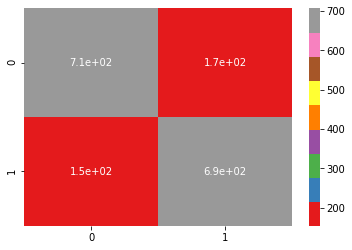

In [ ]:
sns.heatmap(cm_o, annot=True, cmap="Set1");

In [ ]:
# Percentual de acerto de 0 - Ruim
712 / (712+173)

0.8045197740112995

In [ ]:
# Percentual de acerto de 1 - Bom
687 / (687+148)

0.822754491017964